In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [87]:
def potential_LJ(r, sigma, eps):
    return 4 * eps * ((sigma / r) ** 12 - (sigma / r) ** 6)


def potential_fene_lammps(r, K, R_0, sigma, eps):
    r_LJ_min = 2 ** (1 / 6) * sigma

    return np.piecewise(
        r,
        [r <= r_LJ_min, np.logical_and(r > r_LJ_min, r <= R_0), r > R_0],
        [
            lambda r: -0.5 * K * R_0 ** 2 * np.log(1 - (r / R_0) ** 2) + potential_LJ(r, sigma, eps) + eps,
            lambda r: -0.5 * K * R_0 ** 2 * np.log(1 - (r / R_0) ** 2) + eps,
            lambda _: 0
        ]
    )


def potential_harmonic(r, k, r_0):
    return k * (r - r_0) ** 2 / 2


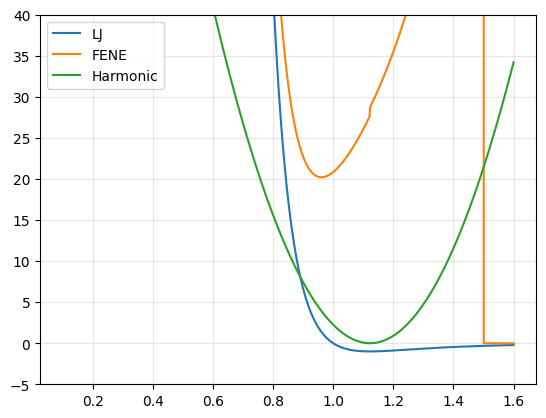

In [88]:
K = 30.0
R_0 = 1.5
eps = 1.0
sigma = 1

rs = np.linspace(.1, 1.6, 1000)

plt.plot(rs, potential_LJ(rs, sigma, eps), label="LJ")
plt.plot(rs, potential_fene_lammps(rs, K, R_0, sigma, eps), label="FENE")
plt.plot(rs, potential_harmonic(rs, k=300, r_0=sigma * 2 ** (1 / 6)), label="Harmonic")
plt.ylim(-5, 40)
plt.grid(alpha=0.3)
plt.legend()

In [93]:
def dist_change_sq_rouse(t, p_max: int, tau_1: float, N: int, b: float):
    result = 0
    for p in range(1, p_max + 1):
        if p % 2 == 0:
            continue
        result += 1 / p ** 2 * (np.exp(-t * p ** 2 / tau_1) + np.exp(t * p ** 2 / tau_1) + 1)
    return 8 * N * b ** 2 / np.pi ** 2 * result

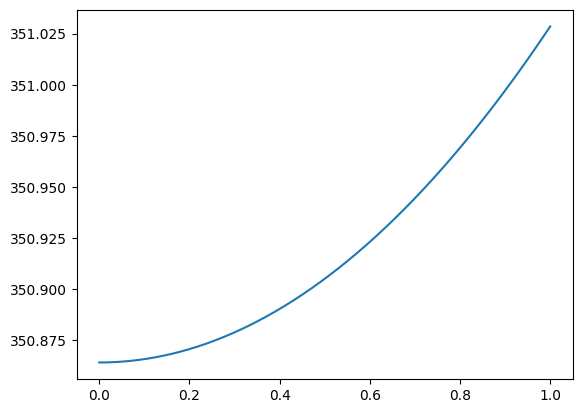

In [104]:
ts = np.linspace(0, 1, 1000)
N_monomers = 128
b = .97  # LJ
zeta = 1 # LJ
tau_1 = N_monomers ** 2 * b ** 2 * zeta / (3 * np.pi ** 2)

plt.plot(ts, dist_change_sq_rouse(ts, p_max=13, N=N_monomers, tau_1=tau_1, b=b))

In [102]:
dist_change_sq_rouse(0, p_max=18, N=N_monomers, tau_1=tau_1, b=b)

353.17884227417375